# The data set is a Home Equity Line of Credit data set that provides information at time of loan, as well as whether the loan defaulted (BAD=1) or repaid (BAD=0).

In [55]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plotter
import matplotlib.pyplot as plt
import seaborn as sns

# to split test and train data
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


In [29]:
# set variable for dataset location
INFILE = "C:\\Users\\aroon\\Desktop\\MSDS\\422\\MSDS422\\Week 1\\HMEQ_Loss.csv"

# import dataset

df = pd.read_csv( INFILE )

# set target columns to a varibale
TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

print("Rows and Columns of the dataset:",df.shape)

# view Head of dataset
df.head()

Rows and Columns of the dataset: (5960, 14)


,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [30]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET_BAD_FLAG  5960 non-null   int64  
 1   TARGET_LOSS_AMT  1189 non-null   float64
 2   LOAN             5960 non-null   int64  
 3   MORTDUE          5442 non-null   float64
 4   VALUE            5848 non-null   float64
 5   REASON           5708 non-null   object 
 6   JOB              5681 non-null   object 
 7   YOJ              5445 non-null   float64
 8   DEROG            5252 non-null   float64
 9   DELINQ           5380 non-null   float64
 10  CLAGE            5652 non-null   float64
 11  NINQ             5450 non-null   float64
 12  CLNO             5738 non-null   float64
 13  DEBTINC          4693 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 652.0+ KB


In [31]:
dt = df.dtypes
objList = []
intList = []
floatList = []
for i in dt.index :
    if i in ( ['TARGET_BAD_FLAG', 'TARGET_LOSS_AMT' ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64"]) : floatList.append( i )
    if dt[i] in (["int64"]) : intList.append( i )

# Descriptive Statistics 
Descriptive statistics are brief descriptive coefficients that summarize a given data set, which is a representation of the entire dataset.

In [32]:
describe = df.describe().T
print(describe)

                  count           mean           std          min  \
TARGET_BAD_FLAG  5960.0       0.199497      0.399656     0.000000   
TARGET_LOSS_AMT  1189.0   13414.576955  10839.455965   224.000000   
LOAN             5960.0   18607.969799  11207.480417  1100.000000   
MORTDUE          5442.0   73760.817200  44457.609458  2063.000000   
VALUE            5848.0  101776.048741  57385.775334  8000.000000   
YOJ              5445.0       8.922268      7.573982     0.000000   
DEROG            5252.0       0.254570      0.846047     0.000000   
DELINQ           5380.0       0.449442      1.127266     0.000000   
CLAGE            5652.0     179.766275     85.810092     0.000000   
NINQ             5450.0       1.186055      1.728675     0.000000   
CLNO             5738.0      21.296096     10.138933     0.000000   
DEBTINC          4693.0      33.779915      8.601746     0.524499   

                          25%           50%            75%            max  
TARGET_BAD_FLAG      0.000

1. Shows that about 19% of the people defaulted on their loan.
2. 1189 out of 5960 had bad loan. The min amount is 224 and max amount is 78987. the maximum amount looks like an outlier compare to the 25%,50% and 75%.
3. This gives a good view of possible outliers when we compare the mean to the max, min, the 4 quartiles.

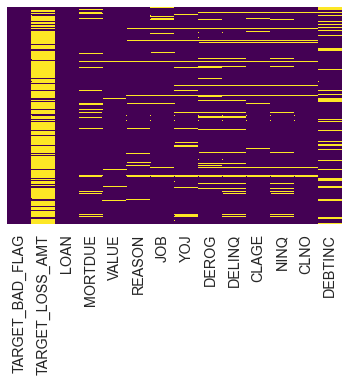

In [33]:
# heatmap of dataset with missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

1. The heat map shows the missing values in each column in yellow. 
2. While many columns have missing values, the column TARGET_LOSS_AMT has the most missing showing that there are are about 20% of the loans that are not replaid and 80% repaid.
3. Column TARGET_BAD_FLAG and LOAN do not have missing values.
4. DEBTINC has the most missing values. Further analysis would be needed to determine how to impute missing values.

[Text(0, 0.5, 'Percent')]

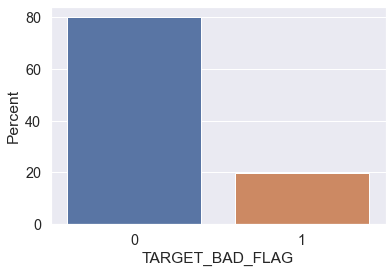

In [34]:
# Target variable : TARGET_BAD_FLAG
Target_1 = sns.barplot(x=TARGET_F, y=TARGET_F, data=df, estimator=lambda x: len(x) / len(df) * 100)
Target_1.set(ylabel="Percent")

The barplot shows that the 80% of the loans have been repaid and 20% of the loan has been defaulted

DebtCon    3928
HomeImp    1780
NaN         252
Name: REASON, dtype: int64
['DebtCon', 'HomeImp', nan]
[3928, 1780, 252]


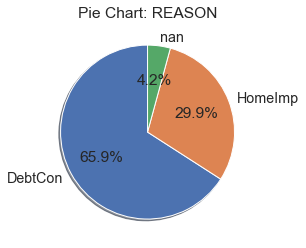

Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: JOB, dtype: int64
['Other', 'ProfExe', 'Office', 'Mgr', nan, 'Self', 'Sales']
[2388, 1276, 948, 767, 279, 193, 109]


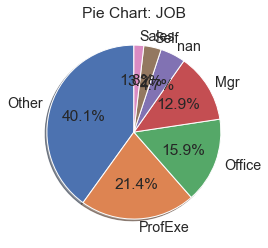

In [35]:
'''
PIE CHARTS for categorical variables
'''

for i in objList :
    x = df[ i ].value_counts(dropna=False)
    print( x )
    theLabels = x.axes[0].tolist()
    print( theLabels )
    theSlices = list(x)
    print( theSlices ) 
    plt.pie( theSlices,
             labels=theLabels,
             startangle = 90,
             shadow=True,
             autopct="%1.1f%%")
    plt.title("Pie Chart: " + i)
  
    plt.show()    
    

The pie chart shows how the categorical values are split in the dataset. 

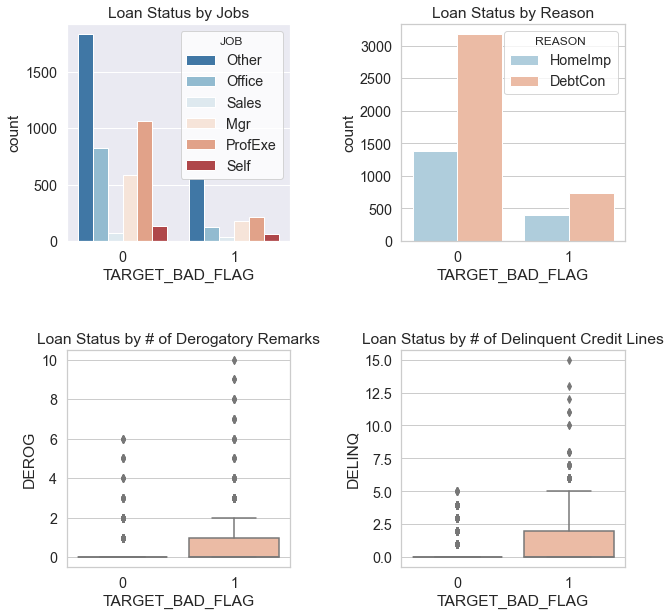

In [36]:
''' get the grouping of bad loans with respect to jobs, reason for loan,Derogatory remarks and 
Delinquencies on your current credit.'''

f, (ax1, ax2,ax3) = plt.subplots(1,3, sharex='col', sharey='row',figsize=(10, 10))

# Count plot by Jobs
plt.subplot(2,2,1)
sns.set_style('whitegrid')
sns.countplot(x= TARGET_F,hue='JOB',data=df,palette='RdBu_r')
plt.title('Loan Status by Jobs')

# count plot by Reason
plt.subplot(2,2,2)
sns.set_style('whitegrid')
sns.countplot(x= TARGET_F,hue='REASON',data=df,palette='RdBu_r')
plt.title('Loan Status by Reason')


# box plot by number of Derogatory Marks
plt.subplot(2,2,3)
sns.set_style('whitegrid')
sns.boxplot(y= 'DEROG', x= TARGET_F,data=df,palette='RdBu_r')
plt.title('Loan Status by # of Derogatory Remarks')

# box plot by number of Derogatory Marks
plt.subplot(2,2,4)
sns.set_style('whitegrid')
sns.boxplot(y= 'DELINQ', x= TARGET_F,data=df,palette='RdBu_r')
plt.title('Loan Status by # of Delinquent Credit Lines')

# spacing between graphs
plt.subplots_adjust(hspace=.5, wspace = .5)
plt.show()

The graphs above show the BAD loan grouped by the catagorical variables Job and Reason.
1. Job catagory 'Other' has the most loan and also the most bad loans.But we do not have a clear idea of what the Other could be. The next job that is risky is ProfExec.
2. Reason variable shows that that there are more loans for debt consolidation compared to home improvements.
3. The variable DEROG and DELINQ have the most variability in values.
4. DELINQ - As the number of Delinquent credit lines and Derogatory remarks increased, there are more bad loans.
5. DEROG: Most of the data is between 0-1 that means there are not many with derogatory remarks. Data can be converted into binary format. 0 for no remarks and 1 for 1 or more remarks.


LOAN, MORTDUE, VALUE, YOJ

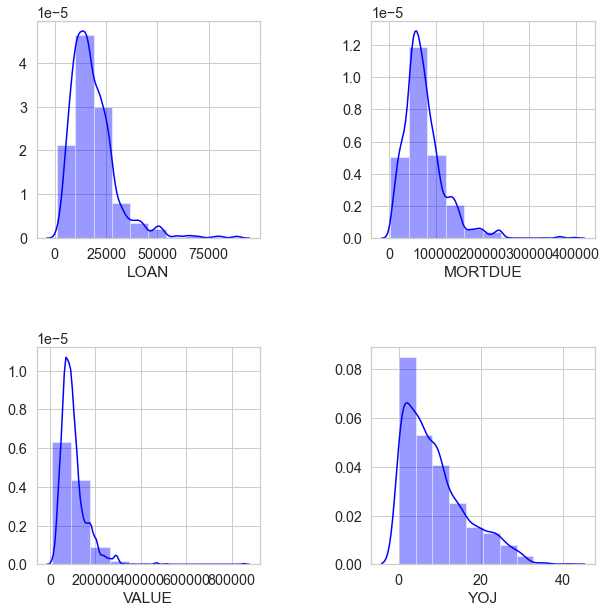

In [37]:
# distribution of Loan amount
f, (ax1, ax2,ax3) = plt.subplots(1,3, sharex='col', sharey='row',figsize=(10, 10))

# LOAN distrubution
plt.subplot(2,2,1)
sns.distplot(df['LOAN'].dropna(),color='blue',bins=10)

# MORTDUE distrubution
plt.subplot(2,2,2)
sns.distplot(df['MORTDUE'].dropna(),color='blue',bins=10)

# VALUE distrubution
plt.subplot(2,2,3)
sns.distplot(df['VALUE'].dropna(),color='blue',bins=10)

# Years at job distrubution
plt.subplot(2,2,4)
sns.distplot(df['YOJ'].dropna(),color='blue',bins=10)


plt.subplots_adjust(hspace=.5, wspace = .5)

plt.show()


1. LOAN: loan amount between 10000 and 20000 is the most populated. There are a few outliers that is skewing the distribution right. Those will need to be handled.
2. MORTDUE: most populated between 50,000 - 100,000; data past 250,000 can be dropped.
3. VALUE: Data is between 10,000- 200,000. Values over 200,000 and 400,000 are a few. Outliers beyond 350,000 needs to be handled.
4. YOJ: extremely right skewed. Data needs to be handled.



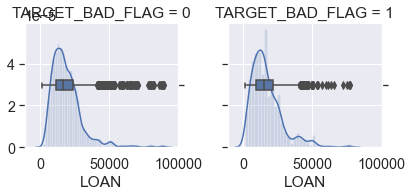

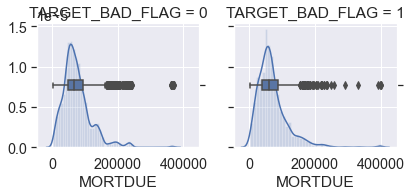

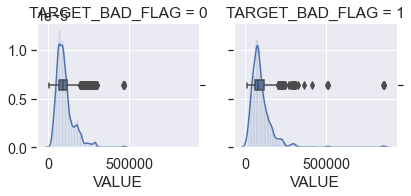

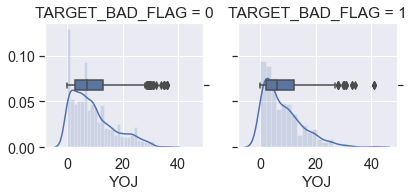

In [38]:
sns.set(font_scale=1.3)

def dist_boxplot(x, **kwargs):
    ax = sns.distplot(x, hist_kws=dict(alpha=0.2))
    ax2 = ax.twinx()
    sns.boxplot(x=x, ax=ax2)
    ax2.set(ylim=(-5, 5))

g = sns.FacetGrid(df, col=TARGET_F)
G1 = g.map(dist_boxplot, 'LOAN', data = df)

g = sns.FacetGrid(df, col=TARGET_F)
G2 = g.map(dist_boxplot, 'MORTDUE', data = df)

g = sns.FacetGrid(df, col=TARGET_F)
G3 = g.map(dist_boxplot, 'VALUE', data = df)

g = sns.FacetGrid(df, col=TARGET_F)
G4 = g.map(dist_boxplot, 'YOJ', data = df)

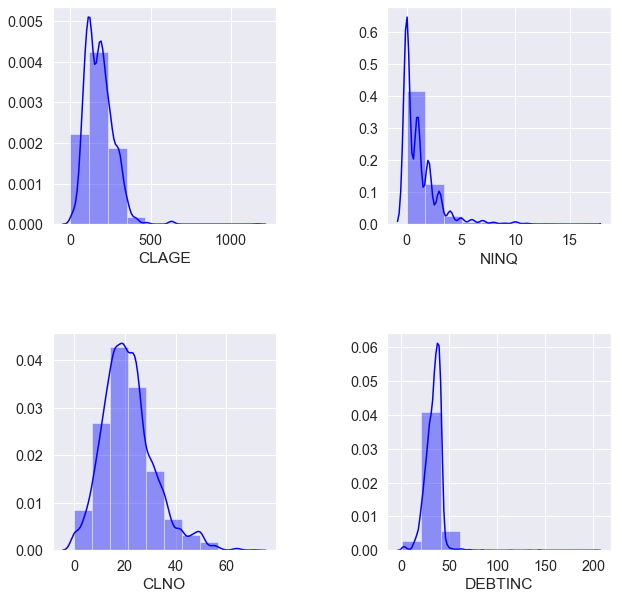

In [39]:
# distribution of Loan amount
f, (ax1, ax2,ax3) = plt.subplots(1,3, sharex='col', sharey='row',figsize=(10, 10))

# CLAGE distrubution
plt.subplot(2,2,1)
sns.distplot(df['CLAGE'].dropna(),color='blue',bins=10)

# NINQ distrubution
plt.subplot(2,2,2)
sns.distplot(df['NINQ'].dropna(),color='blue',bins=10)

# CLNO distrubution
plt.subplot(2,2,3)
sns.distplot(df['CLNO'].dropna(),color='blue',bins=10)

# DEBTINC distrubution
plt.subplot(2,2,4)
sns.distplot(df['DEBTINC'].dropna(),color='blue',bins=10)


plt.subplots_adjust(hspace=.5, wspace = .5)

plt.show()



1. CLAGE: highly populated between 100 - 200. Outlier need to be handled.
2. NINQ: Most of the values are between 0 and 5. 
3. CLNO: Well distributed. 
4. DEBTINC: Debt to income ratio has most values populated between 20- 40 with a few outliers that are skewing the distribution a lot. Outliers need to be handled

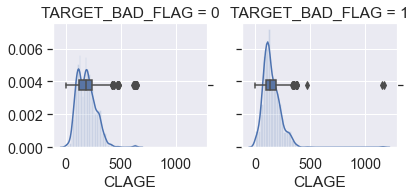

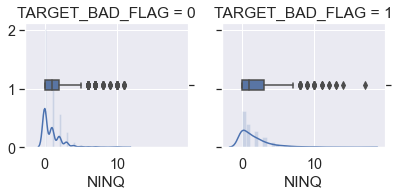

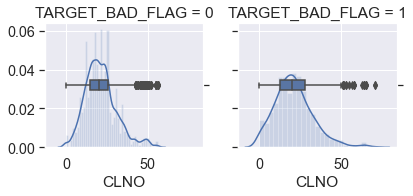

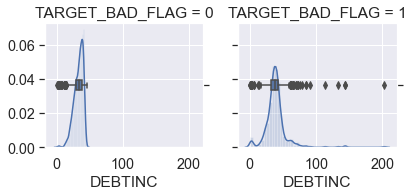

In [40]:
g = sns.FacetGrid(df, col="TARGET_BAD_FLAG")
G1 = g.map(dist_boxplot, 'CLAGE', data = df)

g = sns.FacetGrid(df, col="TARGET_BAD_FLAG")
G2 = g.map(dist_boxplot, 'NINQ', data = df)

g = sns.FacetGrid(df, col="TARGET_BAD_FLAG")
G3 = g.map(dist_boxplot, 'CLNO', data = df)

g = sns.FacetGrid(df, col="TARGET_BAD_FLAG")
G4 = g.map(dist_boxplot, 'DEBTINC', data = df)

In [41]:
for i in objList :
    print( i )
    print( df[i].unique() )
    g = df.groupby( i )
    print( g[i].count() )
    print( "MOST COMMON = ", df[i].mode()[0] )   
    print( "MISSING = ", df[i].isna().sum() )
    print( "\n\n")

REASON
['HomeImp' nan 'DebtCon']
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
MOST COMMON =  DebtCon
MISSING =  252



JOB
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
MOST COMMON =  Other
MISSING =  279





Missing Data Imputation

In [42]:
# Create a column for Missing Flag and Imputing missing values



for i in intList :
    NAME = "IMP_"+i
    FLAG = "M_" + i
    df[NAME] = df[i]
    df[ FLAG ] = df[i].isna() + 0
for i in floatList :
    NAME = "IMP_"+i
    FLAG = "M_" + i
    df[NAME] = df[i]
    df[ FLAG ] = df[i].isna() + 0
for i in objList :
    NAME = "IMP_"+i
    df[NAME] = df[i]
    

DEBTINC - debt to income ratio is high then you are risky because you might not be able to pay your bills. This is an important variable for prediction. This is also the variable with most missing data. Imputing t with mean value by reason 

In [43]:
##### DEBTINC
print(np.mean(df.loc[df.REASON == 'HomeImp','DEBTINC']))
print(np.mean(df.loc[df.REASON == 'DebtCon','DEBTINC']))
print(np.mean(df.loc[pd.isnull(df.REASON) == True,'DEBTINC']))



33.28006315745359
34.30879626604945
28.830722200020382


In [17]:
# impute the mean by reason.
df.loc[(df.REASON == 'HomeImp') & (pd.isnull(df.IMP_DEBTINC) == True),'IMP_DEBTINC'] = np.mean(df.loc[df.REASON == 'HomeImp','IMP_DEBTINC'])
df.loc[(df.REASON == 'DebtCon') & (pd.isnull(df.IMP_DEBTINC) == True),'IMP_DEBTINC'] = np.mean(df.loc[df.REASON == 'DebtCon','IMP_DEBTINC'])
df.loc[(pd.isnull(df.REASON) == True) & (pd.isnull(df.IMP_DEBTINC) == True),'IMP_DEBTINC'] = np.mean(df.loc[pd.isnull(df.REASON) == True,'IMP_DEBTINC'])



In [44]:
# impute missing DELINQ 

df.loc[pd.isnull(df.IMP_DELINQ)==True, 'IMP_DELINQ'] = 0

# impute YOJ

df['IMP_YOJ']=df['IMP_YOJ'].fillna(df['YOJ'].median())

# impute DEROG  by median grouped by variable

df.loc[(df.TARGET_BAD_FLAG == 1) & (pd.isnull(df.IMP_DEROG) == True),'IMP_DEROG'] = np.mean(df.loc[df.TARGET_BAD_FLAG == 1,'IMP_DEROG'])
df.loc[(df.TARGET_BAD_FLAG == 0) & (pd.isnull(df.IMP_DEROG) == True),'IMP_DEROG'] = np.mean(df.loc[df.TARGET_BAD_FLAG == 0,'IMP_DEROG'])

# impute NINQ


df.loc[(df.TARGET_BAD_FLAG == 1) & (pd.isnull(df.IMP_NINQ) == True),'IMP_NINQ'] = np.mean(df.loc[df.TARGET_BAD_FLAG == 1,'IMP_NINQ'])
df.loc[(df.TARGET_BAD_FLAG == 0) & (pd.isnull(df.IMP_NINQ) == True),'IMP_NINQ'] = np.mean(df.loc[df.TARGET_BAD_FLAG == 0,'IMP_NINQ'])


# impute CLNO  by median grouped by target variable

df.loc[(df.TARGET_BAD_FLAG == 1) & (pd.isnull(df.IMP_CLNO) == True),'IMP_CLNO'] = np.mean(df.loc[df.TARGET_BAD_FLAG == 1,'IMP_CLNO'])
df.loc[(df.TARGET_BAD_FLAG == 0) & (pd.isnull(df.IMP_CLNO) == True),'IMP_CLNO'] = np.mean(df.loc[df.TARGET_BAD_FLAG == 0,'IMP_CLNO'])



In [45]:
# Capping off the features CLAGE(values >= 600 to 600) , VALUE(values>=400000 to 400000) , MORTDUE(values>=300000 to 300000) and DEBTINC(values >=100 to 100)

df.loc[df['IMP_CLAGE']>=600, 'IMP_CLAGE'] = 600

df.loc[df['IMP_VALUE']>=400000, 'IMP_VALUE'] = 400000

df.loc[df['IMP_MORTDUE']>=300000, 'IMP_MORTDUE'] = 300000
       
df.loc[df["IMP_DEBTINC"]>=100, "IMP_DEBTINC"] = 100



In [46]:
# impute CLAGE the mean by reason after chopping off outliers.
df.loc[(df.REASON == 'HomeImp') & (pd.isnull(df.IMP_CLAGE) == True),'IMP_CLAGE'] = np.mean(df.loc[df.REASON == 'HomeImp',"IMP_CLAGE"])
df.loc[(df.REASON == 'DebtCon') & (pd.isnull(df.IMP_CLAGE) == True),'IMP_CLAGE'] = np.mean(df.loc[df.REASON == 'DebtCon',"IMP_CLAGE"])
df.loc[(pd.isnull(df.REASON) == True) & (pd.isnull(df.IMP_CLAGE) == True),'IMP_CLAGE'] = np.mean(df.loc[pd.isnull(df.REASON) == True,"IMP_CLAGE"])

# impute Value the mean by job after chopping off outliers.
df.loc[(df.REASON == 'HomeImp') & (pd.isnull(df.IMP_VALUE) == True),'IMP_VALUE'] = np.mean(df.loc[df.REASON == 'HomeImp',"IMP_VALUE"])
df.loc[(df.REASON == 'DebtCon') & (pd.isnull(df.IMP_VALUE) == True),'IMP_VALUE'] = np.mean(df.loc[df.REASON == 'DebtCon',"IMP_VALUE"])
df.loc[(pd.isnull(df.REASON) == True) & (pd.isnull(df.IMP_VALUE) == True),'IMP_VALUE'] = np.mean(df.loc[pd.isnull(df.REASON) == True,"IMP_VALUE"])

# impute mortgage due with the mean byReason after chopping off outliers.
df.loc[(df.REASON == 'HomeImp') & (pd.isnull(df.IMP_MORTDUE) == True),'IMP_MORTDUE'] = np.mean(df.loc[df.REASON == 'HomeImp',"IMP_MORTDUE"])
df.loc[(df.REASON == 'DebtCon') & (pd.isnull(df.IMP_MORTDUE) == True),'IMP_MORTDUE'] = np.mean(df.loc[df.REASON == 'DebtCon',"IMP_MORTDUE"])
df.loc[(pd.isnull(df.REASON) == True) & (pd.isnull(df.IMP_MORTDUE) == True),'IMP_MORTDUE'] = np.mean(df.loc[pd.isnull(df.REASON) == True,"IMP_MORTDUE"])




In [47]:
# Nominal features
# Replacement using majority class
# majority class in case of JOB variable is Other
# majority class in case of REASON varibale is DebtCon


df['IMP_REASON'].fillna(value = "DebtCon",inplace = True)
def Reason_to_numeric(x):
    if x=='HomeImp':
        return 1
    if x=='DebtCon':
        return 2

df['IMP_REASON'] = df['IMP_REASON'].apply(Reason_to_numeric)

# impute missing JOB with missing

df.loc[pd.isnull(df.IMP_JOB)==True, NAME] = 'Missing'


def Job_to_numeric(x):
    if x=='Other':
        return 1
    if x=='ProfExe':
        return 2
    if x=='Office':
        return 3
    if x=='Mgr':
        return 4
    if x=='Self':
        return 5
    if x=='Sales':
        return 6 
    if x=='Missing':
        return 7
    

df['IMP_JOB'] = df['IMP_JOB'].apply(Job_to_numeric)


In [22]:
df.isnull().sum()

TARGET_BAD_FLAG       0
TARGET_LOSS_AMT    4771
LOAN                  0
MORTDUE             518
VALUE               112
REASON              252
JOB                 279
YOJ                 515
DEROG               708
DELINQ              580
CLAGE               308
NINQ                510
CLNO                222
DEBTINC            1267
IMP_LOAN              0
M_LOAN                0
IMP_MORTDUE           0
M_MORTDUE             0
IMP_VALUE             0
M_VALUE               0
IMP_YOJ               0
M_YOJ                 0
IMP_DEROG             0
M_DEROG               0
IMP_DELINQ            0
M_DELINQ              0
IMP_CLAGE             0
M_CLAGE               0
IMP_NINQ              0
M_NINQ                0
IMP_CLNO              0
M_CLNO                0
IMP_DEBTINC           0
M_DEBTINC             0
IMP_REASON            0
IMP_JOB               0
dtype: int64

# split df into test and train

In [59]:
# copy the data frame

X= df # independent variables in x data frame
X = X.drop(TARGET_F, axis = 1)
X = X.drop(TARGET_A, axis = 1)

Y = df[[TARGET_F,TARGET_A]]


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2 )


In [61]:
print( "FLAG DATA" )
print( "TRAINING = ", X_train.shape )
print( "TEST = ", X_test.shape )

FLAG DATA
TRAINING =  (4768, 34)
TEST =  (1192, 34)


In [25]:
# drop target varibale and columns with null values that are not needed for prediction

#df3=df2.drop(columns=['TARGET_BAD_FLAG','REASON','VALUE','DEBTINC','M_DEBTINC','DELINQ','M_DELINQ','JOB','CLAGE','MORTDUE'])


Create test and train data set

In [27]:
# create training and testing vars
from sklearn.model_selection import train_test_split

y = df[TARGET_F]
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.2)

